### 1.1 Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from bs4 import BeautifulSoup #importing BeautifulSoup library for web scraping

print('Libraries imported.')

Libraries imported.


### 1.2 Using BeautifulSoup library to Scrape data from Wikipedia page

In [2]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai#Mumbai_neighbourhood_coordintes').text

soup = BeautifulSoup(url, 'lxml')
 

In [3]:
My_table =soup.find_all('table',{'class':'wikitable sortable' })


In [4]:
rows = My_table[0].findAll('tr')

In [5]:
Area = []
Location = []
Latitude = []
Longitude = []

for row in rows:
    columns = row.findAll('td')
    if len(columns) == 4:
        Area.append(columns[0].find(text = True).rstrip())
        Location.append(columns[1].find(text = True).rstrip())
        Latitude.append(columns[2].find(text = True).rstrip())
        Longitude.append(columns[3].find(text = True).rstrip())

### 1.3 Store data into a Dataframe

In [6]:
df = pd.DataFrame(Area, columns = ['Neighbourhood'])
df['Location'] = Location
df['Latitude'] = Latitude
df['Longitude'] = Longitude
df.head()

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927


In [7]:
convert_dict = { 'Latitude' : float, 'Longitude' : float}
df = df.astype(convert_dict)
df.dtypes

Neighbourhood     object
Location          object
Latitude         float64
Longitude        float64
dtype: object

In [8]:
df.to_csv("mumbai_df.csv", index=False)

In [9]:
new_df = pd.read_csv("mumbai_df.csv")
new_df.head()

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


In [10]:
new_df

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


### 1.4 There are some wrong Longitude and Latitude values in the dataset
    so, i will mmanually corrrect them

In [11]:
new_df.at[41,'Latitude'] = 19.0640
new_df.at[41,'Longitude'] = 72.8826
new_df.at[82,'Latitude'] = 19.0197
new_df.at[82,'Longitude'] = 72.8479
new_df.at[68,'Latitude'] = 18.9865
new_df.at[68,'Longitude'] = 72.8183


In [12]:
new_df

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


### 1.5 Get the geographical coordinates of Mumbai 

In [13]:

address = 'Mumbai, India'
geolocator = Nominatim(user_agent= 'akashkadam1180@gmail.com')
location = None
while(location is None):
    location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


### 1.6 Create a map of Mumbai with Neighbourhoods superimposed on top

In [14]:
# create map of New York using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, area in zip(new_df['Latitude'], new_df['Longitude'], new_df['Neighbourhood']):
    label = '{},Mumbai,India'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)

In [15]:
map_mumbai

### 1.7 Using Foursquare API to explore neighbourhood

In [16]:
Client_id = 'MIGVZGZSO220UCPJGIIXZWNPQE5QSLCNMBLNEDWGKHVRUC2Y'# Your client id
Client_secret = '45DIL52O2RVEW5WTPFMKTY2U3KK43MW0VJMBTIL01WCQQISO' # Your client secret
Version = '20180605' # Foursquare API version

##### Now let's get the top 100 venues within 500 meters

In [18]:
radius = 500
limit = 100
venues = []
for lat,long,area,location in zip(new_df['Latitude'], new_df['Longitude'], new_df['Neighbourhood'], new_df['Location']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        Client_id,
        Client_secret,
        Version,
        lat,
        long,
        radius, 
        limit)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
            venues.append((
            area,
            location,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [19]:
venues

[('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Cafe Arfa',
  19.12893009094341,
  72.84714004510111,
  'Indian Restaurant'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  '5 Spice , Bandra',
  19.130421080343595,
  72.84720633881638,
  'Chinese Restaurant'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Subway',
  19.1278600430168,
  72.84446095143547,
  'Sandwich Place'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Cafe Coffee Day',
  19.127748138225197,
  72.84466295105099,
  'Coffee Shop'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Bhardawadi Ground',
  19.12614307830214,
  72.84354839292276,
  'Park'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Nukkad Food Bistro',
  19.126058395334162,
  72.84661784019497,
  'Fast Food Restaurant'),
 ('Chakala, Andheri',
  'Western Suburbs',
  19.111388,
  72.860833,
  "Faaso's",
  19.113938442040993,
  72.86232968704125,


In [20]:
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Location', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1359, 8)


,Neighbourhood,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Bhardawadi Ground,19.126143,72.843548,Park


##### Let's find out how many unique categories can be curated from all the returned venues

In [21]:
uniquevenues = len(venues_df.VenueCategory.unique())
uniquevenues

176

In [22]:
venues_df['VenueCategory'].unique()[:50]

array(['Indian Restaurant', 'Chinese Restaurant', 'Sandwich Place',
       'Coffee Shop', 'Park', 'Fast Food Restaurant', 'Pizza Place',
       'Hotel', 'Café', 'Falafel Restaurant', 'Cocktail Bar',
       'Asian Restaurant', 'Restaurant', 'Multiplex',
       'Seafood Restaurant', 'Wine Shop', 'Gym / Fitness Center',
       'Snack Place', 'Light Rail Station', 'Juice Bar',
       'Residential Building (Apartment / Condo)', 'Fish Market',
       'Vegetarian / Vegan Restaurant', "Women's Store", 'Market', 'Bar',
       'Gym', 'Sports Club', 'Accessories Store', 'Electronics Store',
       'Convenience Store', 'Playground', 'Smoke Shop', 'Liquor Store',
       'Pub', 'Lounge', 'Concert Hall', 'Department Store',
       'Ice Cream Shop', 'Diner', 'Bakery', 'Food',
       'South Indian Restaurant', 'Recreation Center', 'Bistro',
       'Dessert Shop', 'Creperie', 'Salon / Barbershop', 'Clothing Store',
       'Soccer Stadium'], dtype=object)

In [23]:
venues_df['VenueCategory'].value_counts()

Indian Restaurant                           172
Café                                         82
Coffee Shop                                  57
Fast Food Restaurant                         53
Bakery                                       47
Bar                                          43
Pizza Place                                  39
Chinese Restaurant                           38
Ice Cream Shop                               37
Restaurant                                   35
Dessert Shop                                 34
Hotel                                        29
Italian Restaurant                           23
Snack Place                                  21
Sandwich Place                               20
Electronics Store                            18
Seafood Restaurant                           18
Vegetarian / Vegan Restaurant                17
Clothing Store                               17
Lounge                                       17
Gym                                     

In [24]:
grouped_venues = venues_df.groupby(["Neighbourhood"])
grouped_venues.head(10)

,Neighbourhood,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Bhardawadi Ground,19.126143,72.843548,Park
5,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Nukkad Food Bistro,19.126058,72.846618,Fast Food Restaurant
6,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Faaso's,19.113938,72.862330,Fast Food Restaurant
7,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Pizza Hut,19.112928,72.864434,Pizza Place
8,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Courtyard Mumbai International Airport,19.114167,72.864131,Hotel
9,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Cafe Coffee Day,19.112272,72.861106,Café


### 1.8 Analyze each Neighbourhood

In [25]:
mum_onehot = pd.get_dummies(venues_df["VenueCategory"], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
mum_onehot['Neighbourhoods'] = venues_df['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [mum_onehot.columns[-1]] + list(mum_onehot.columns[:-1])
mum_onehot = mum_onehot[fixed_columns]

print(mum_onehot.shape)
mum_onehot.head()

(1359, 177)


,Neighbourhoods,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Cafeteria,Café,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,College Technology Building,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,History Museum,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

##### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [26]:
mum_grouped = mum_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(mum_grouped.shape)
mum_grouped.head(10)

(89, 177)


,Neighbourhoods,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Cafeteria,Café,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,College Technology Building,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,History Museum,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Aarey Milk Colony,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Agripada,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0

##### view top 10 most common venues in each neighbourhood

In [27]:
num_top_venues = 10

for hood in mum_grouped['Neighbourhoods']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighbourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aarey Milk Colony----
                       venue  freq
0                Snack Place   1.0
1         Mexican Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3         Miscellaneous Shop   0.0
4        Monument / Landmark   0.0
5            Motorcycle Shop   0.0
6              Movie Theater   0.0
7         Mughlai Restaurant   0.0
8                  Multiplex   0.0
9                Music Store   0.0


----Agripada----
                venue  freq
0              Bakery  0.33
1          Restaurant  0.17
2                 Gym  0.17
3         Coffee Shop  0.17
4   Indian Restaurant  0.17
5       Movie Theater  0.00
6  Mughlai Restaurant  0.00
7           Multiplex  0.00
8         Music Store  0.00
9         Music Venue  0.00


----Altamount Road----
                venue  freq
0                Café  0.25
1              Bakery  0.12
2         Pizza Place  0.12
3   Indian Restaurant  0.12
4         Coffee Shop  0.12
5             Theater  0.12
6      Sandwich Place  0.12
7           N

### 1.9 Create new Dataframe with 10 most common venues in each Neighbourhood

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = mum_grouped['Neighbourhoods']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Milk Colony,Snack Place,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant,Dhaba
1,Agripada,Bakery,Coffee Shop,Indian Restaurant,Restaurant,Gym,Amphitheater,Dhaba,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,Altamount Road,Café,Coffee Shop,Sandwich Place,Pizza Place,Theater,Indian Restaurant,Bakery,Yoga Studio,Department Store,Electronics Store
3,Amboli,Coffee Shop,Indian Restaurant,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Park,German Restaurant,Donut Shop,Diner,Gourmet Shop
4,Amrut Nagar,Indian Restaurant,Café,Restaurant,Fast Food Restaurant,Asian Restaurant,Electronics Store,Park,Pizza Place,Bowling Alley,Falafel Restaurant


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [31]:
max_range = 8

mum_grouped_clustering = mum_grouped.drop('Neighbourhoods', axis = 1)
mum_grouped_clustering.head()

,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Cafeteria,Café,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,College Technology Building,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,History Museum,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000

### 1.10 Cluster Neighborhoods

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = mum_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

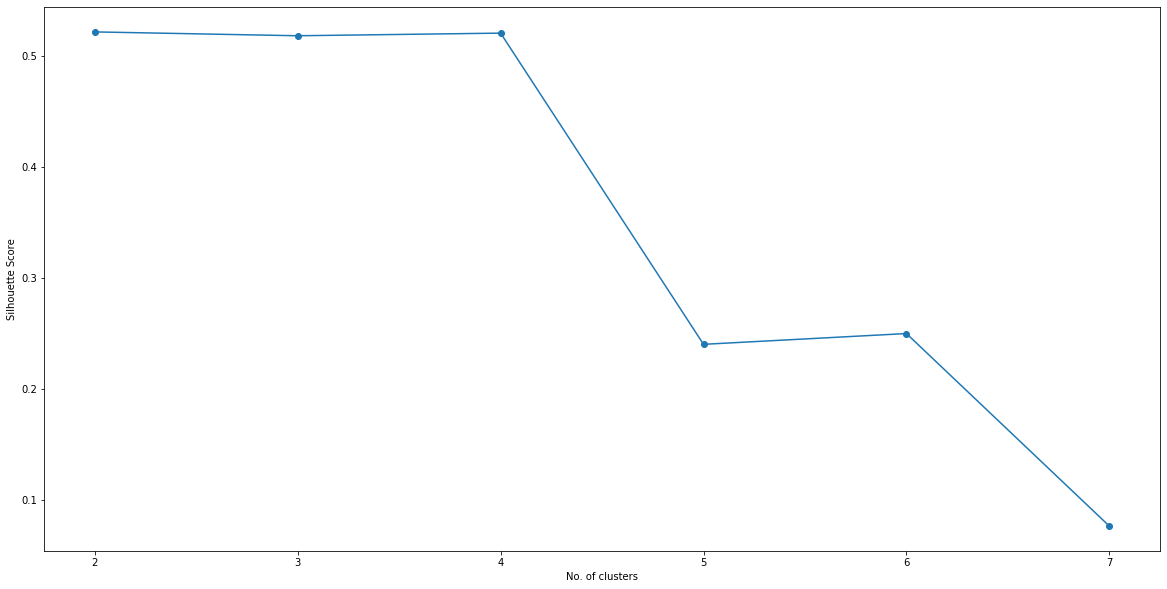

In [33]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [34]:
# run k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(mum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# add clustering labels
venues_sorted = neighborhoods_venues_sorted
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [36]:
mumbai_merged = new_df

# merge mumbai_merged with neighbourhoods_venues_sorted to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

mumbai_merged

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,0.0,Coffee Shop,Indian Restaurant,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Park,German Restaurant,Donut Shop,Diner,Gourmet Shop
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,0.0,Hotel,Multiplex,Fast Food Restaurant,Restaurant,Wine Shop,Gym / Fitness Center,Seafood Restaurant,Cocktail Bar,Falafel Restaurant,Pizza Place
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,0.0,Gym / Fitness Center,Cocktail Bar,Pizza Place,Chinese Restaurant,Snack Place,Indian Restaurant,Light Rail Station,Dessert Shop,Event Space,Electronics Store
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,0.0,Electronics Store,Chinese Restaurant,Pizza Place,Restaurant,Residential Building (Apartment / Condo),Juice Bar,Fish Market,Smoke Shop,Bar,Playground
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,0.0,Cocktail Bar,Indian Restaurant,Coffee Shop,Pizza Place,Department Store,Pub,Residential Building (Apartment / Condo),Restaurant,Market,Liquor Store
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,0.0,Indian Restaurant,Ice Cream Shop,Bakery,Coffee Shop,Asian Restaurant,Hotel,Food,Diner,Park,Snack Place
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,0.0,Café,Ice Cream Shop,Pub,Indian Restaurant,Chinese Restaurant,Bar,Seafood Restaurant,Salon / Barbershop,Creperie,Electronics Store
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000,0.0,Soccer Stadium,Bar,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,0.0,Pizza Place,Vegetarian / Vegan Restaurant,Diner,Fast Food Restaurant,Yoga Studio,Department Store,Falafel Restaurant,Event Space,Electronics Store,Donut Shop


In [37]:
mumbai_merged = mumbai_merged.dropna()
mumbai_merged

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,0.0,Coffee Shop,Indian Restaurant,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Park,German Restaurant,Donut Shop,Diner,Gourmet Shop
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,0.0,Hotel,Multiplex,Fast Food Restaurant,Restaurant,Wine Shop,Gym / Fitness Center,Seafood Restaurant,Cocktail Bar,Falafel Restaurant,Pizza Place
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,0.0,Gym / Fitness Center,Cocktail Bar,Pizza Place,Chinese Restaurant,Snack Place,Indian Restaurant,Light Rail Station,Dessert Shop,Event Space,Electronics Store
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,0.0,Electronics Store,Chinese Restaurant,Pizza Place,Restaurant,Residential Building (Apartment / Condo),Juice Bar,Fish Market,Smoke Shop,Bar,Playground
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,0.0,Cocktail Bar,Indian Restaurant,Coffee Shop,Pizza Place,Department Store,Pub,Residential Building (Apartment / Condo),Restaurant,Market,Liquor Store
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,0.0,Indian Restaurant,Ice Cream Shop,Bakery,Coffee Shop,Asian Restaurant,Hotel,Food,Diner,Park,Snack Place
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,0.0,Café,Ice Cream Shop,Pub,Indian Restaurant,Chinese Restaurant,Bar,Seafood Restaurant,Salon / Barbershop,Creperie,Electronics Store
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000,0.0,Soccer Stadium,Bar,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,0.0,Pizza Place,Vegetarian / Vegan Restaurant,Diner,Fast Food Restaurant,Yoga Studio,Department Store,Falafel Restaurant,Event Space,Electronics Store,Donut Shop
10,Bhayandar,"Mira-Bhayandar,Western Suburbs",19.290000,72.850000,5.0,Shipping Store,Yoga Studio,College Auditorium,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant,Dhaba


#### Now, let's see how many Neighbourhoods are there in each cluster

In [38]:
print(mumbai_merged['Cluster Labels'].value_counts())

0.0    81
4.0     4
3.0     1
2.0     1
1.0     1
5.0     1
Name: Cluster Labels, dtype: int64


### 1.11 Finally, let's visualize the resulting clusters

In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [44]:
cluster_colours = ['#052ef7', '#f7df02', '#0be31a', '#f00028', '#f011aa','#02f79e']

In [45]:
# add markers to the map
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighbourhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster_colours[int(cluster)],
        fill=True,
        fill_color=cluster_colours[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 1.12 Examine Clusters

#### Cluster 0

In [46]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,0.0,Coffee Shop,Indian Restaurant,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Park,German Restaurant,Donut Shop,Diner,Gourmet Shop
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,0.0,Hotel,Multiplex,Fast Food Restaurant,Restaurant,Wine Shop,Gym / Fitness Center,Seafood Restaurant,Cocktail Bar,Falafel Restaurant,Pizza Place
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,0.0,Gym / Fitness Center,Cocktail Bar,Pizza Place,Chinese Restaurant,Snack Place,Indian Restaurant,Light Rail Station,Dessert Shop,Event Space,Electronics Store
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,0.0,Electronics Store,Chinese Restaurant,Pizza Place,Restaurant,Residential Building (Apartment / Condo),Juice Bar,Fish Market,Smoke Shop,Bar,Playground
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,0.0,Cocktail Bar,Indian Restaurant,Coffee Shop,Pizza Place,Department Store,Pub,Residential Building (Apartment / Condo),Restaurant,Market,Liquor Store
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,0.0,Indian Restaurant,Ice Cream Shop,Bakery,Coffee Shop,Asian Restaurant,Hotel,Food,Diner,Park,Snack Place
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,0.0,Café,Ice Cream Shop,Pub,Indian Restaurant,Chinese Restaurant,Bar,Seafood Restaurant,Salon / Barbershop,Creperie,Electronics Store
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000,0.0,Soccer Stadium,Bar,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,0.0,Pizza Place,Vegetarian / Vegan Restaurant,Diner,Fast Food Restaurant,Yoga Studio,Department Store,Falafel Restaurant,Event Space,Electronics Store,Donut Shop
11,Uttan,"Mira-Bhayandar,Western Suburbs",19.280000,72.785000,0.0,Beach,Resort,Playground,Indian Restaurant,Bus Station,Yoga Studio,Event Space,Electronics Store,Donut Shop,Diner


This is the biggest cluster containing 81 Neighbourhoods. These Neighbourhoods are the Blue colured dots in the map. The Neighbourhoods belonging to this cluster are popular for having Indian Restaurant, Chinese Restaurant,Pub, Fast Food Restaurant, Bar, Recreation Center, Market, Multiplex, Train/Bus Station. These Neighbourhoods may interest people having diverse food choices starting from Indian, Chinese, Seafood, Falafel, Dumpling, Mediterranean. We see that this neighborhood would be something that would be interesting to those who depend more on the public commute since these neighborhoods are closer to train and bus stations. There are many Pubs, Nightclubs, Cafes, Bars which may attract people who like to Party a lot. 

#### Cluster 1

In [47]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Aarey Milk Colony,"Goregaon,Western Suburbs",19.148493,72.881756,1.0,Snack Place,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant,Dhaba


 Very few neighbourhoods belong to this cluster, making this unique. they are the Yellow dots in the map. as you can see they are far away from the main city. They are popular for Event Space, Yoga Studio, Diner.

#### Cluster 2

In [48]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2]


,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,Vikhroli,Eastern Suburbs,19.11,72.94,2.0,ATM,Women's Store,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant,Dhaba


The Neighbourhoods belonging to this Cluster are popular for having ATM, Event Space and Stores. These Neighbourhoods are repesented by green coloured circles on the above map. 

#### Cluster 3

In [49]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3]


,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Cuffe Parade,South Mumbai,18.91,72.81,3.0,Garden,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant,Dhaba


Only one Neighbourhood in this cluster. It is represented by red dot in the map.It is unique because it is located in far south of the city. This area contains Gardens, Doonut Shop, Restaurants.

#### Cluster 4

In [50]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,Kanjurmarg,Eastern Suburbs,19.130000,72.940000,4.0,Multiplex,Bakery,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant
52,Agripada,South Mumbai,18.977700,72.827300,4.0,Bakery,Coffee Shop,Indian Restaurant,Restaurant,Gym,Amphitheater,Dhaba,Fast Food Restaurant,Farmers Market,Falafel Restaurant
59,Cotton Green,South Mumbai,18.986209,72.844076,4.0,Hookah Bar,Clothing Store,Plaza,Bakery,Yoga Studio,Department Store,Falafel Restaurant,Event Space,Electronics Store,Donut Shop
80,Dagdi Chawl,"Byculla,South Mumbai",18.977129,72.829131,4.0,Indian Restaurant,Restaurant,Bakery,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner


This cluster is containing 4 Neighbourhood. Neighbourhoods in this cluster are popular for having Bakery, Multiplex, Indian Restaurant. This cluster is represented by pink dots on the map.

#### Cluster 5

In [51]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 5]

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Bhayandar,"Mira-Bhayandar,Western Suburbs",19.29,72.85,5.0,Shipping Store,Yoga Studio,College Auditorium,Falafel Restaurant,Event Space,Electronics Store,Donut Shop,Diner,Dim Sum Restaurant,Dhaba


The Neighbourhoods in this cluster are popular for Shipping Store, College Audutorium, Stores.

Since, the objective of this study is to compare the neighbourhoods between the two cities of Mumbai and New York, and not really to compare neighborhoods within Mumbai, we will put forth our conclusion from the study after doing a similar analysis on the neighborhoods in New York.

### 2.1 Now, Download the New York dataset

In [52]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [53]:
neighbourhoods_data = newyork_data['features']
neighbourhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### 2.2 Store Data into a Dataframe

In [54]:
# define the dataframe columns
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbourhoods = pd.DataFrame(columns=column_names)
neighbourhoods.to_csv("ny_df.csv", index = False)

In [55]:
for data in neighbourhoods_data:
    borough = neighbourhood_name = data['properties']['borough'] 
    neighbourhood_name = data['properties']['name']
        
    neighbourhood_latlon = data['geometry']['coordinates']
    neighbourhood_lat = neighbourhood_latlon[1]
    neighbourhood_lon = neighbourhood_latlon[0]
    
    neighbourhoods = neighbourhoods.append({'Borough': borough,
                                          'Neighbourhood': neighbourhood_name,
                                          'Latitude': neighbourhood_lat,
                                          'Longitude': neighbourhood_lon}, ignore_index=True)

In [56]:
neighbourhoods.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [57]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### 2.3 Create a map of New York with Neighbourhoods superimposed on top

In [58]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(neighbourhoods['Latitude'], neighbourhoods['Longitude'], neighbourhoods['Borough'], neighbourhoods['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [59]:
print(neighbourhoods.Borough.value_counts())

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64


Since Manhattan and Brooklyn are most famous Boroughs in New York. For this project we will only consider Manhattan & Brooklyn. 

In [60]:
df = neighbourhoods[neighbourhoods.Borough == 'Manhattan']
df = df.append(neighbourhoods[neighbourhoods.Borough == 'Brooklyn'])
df.head()

,Borough,Neighbourhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
100,Manhattan,Chinatown,40.715618,-73.994279
101,Manhattan,Washington Heights,40.851903,-73.936900
102,Manhattan,Inwood,40.867684,-73.921210
103,Manhattan,Hamilton Heights,40.823604,-73.949688


In [61]:
print(df.shape)
df = df.reset_index()
df

(110, 4)


,index,Borough,Neighbourhood,Latitude,Longitude
0,6,Manhattan,Marble Hill,40.876551,-73.910660
1,100,Manhattan,Chinatown,40.715618,-73.994279
2,101,Manhattan,Washington Heights,40.851903,-73.936900
3,102,Manhattan,Inwood,40.867684,-73.921210
4,103,Manhattan,Hamilton Heights,40.823604,-73.949688
5,104,Manhattan,Manhattanville,40.816934,-73.957385
6,105,Manhattan,Central Harlem,40.815976,-73.943211
7,106,Manhattan,East Harlem,40.792249,-73.944182
8,107,Manhattan,Upper East Side,40.775639,-73.960508
9,108,Manhattan,Yorkville,40.775930,-73.947118


In [62]:
df = df.drop('index',1)
df

,Borough,Neighbourhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [63]:
map_ny = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat,lan,borough,neigh in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neigh, borough)
    pop = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lan],
    radius = 5,
    popup = pop,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_ny)

map_ny

### 2.4 Using Foursquare API to explore neighbourhood

In [72]:
Client_id = 'RPHKPURP1EUPUUWDS1CI4XS15RMXQVLMVEEHYIYVJYBQV3U5'# Your client id
Client_secret = 'YPS3JJI3FQROAQMK0JPJDKQWEJEI4XPHWWG3D2SPA5NM0PQE' # Your client secret
Version = '20180605' # Foursquare API version

In [73]:
radius = 500
limit = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_id, 
            Client_secret, 
            Version, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [74]:
new_york_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine

In [75]:
print(new_york_venues.shape)
new_york_venues.head()

(5928, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [76]:
ny_venues_df = pd.DataFrame(new_york_venues)
ny_venues_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


#### Let's find out how many unique categories can be curated from all the returned venues 

In [77]:
venues_df = ny_venues_df
uniquevenues = len(venues_df['Venue Category'].unique())
uniquevenues

381

In [78]:
venues_df['Venue Category'].unique()[:50]

array(['Pizza Place', 'Yoga Studio', 'Diner', 'Donut Shop', 'Coffee Shop',
       'Gym', 'Pharmacy', 'Department Store', 'Tennis Stadium',
       'Discount Store', 'Supplement Shop', 'Seafood Restaurant',
       'Ice Cream Shop', 'Video Game Store', 'Sandwich Place',
       'Big Box Store', 'Steakhouse', 'Kids Store', 'Deli / Bodega',
       'Hotel', 'Cocktail Bar', 'Greek Restaurant', 'Chinese Restaurant',
       'Spa', 'Bakery', 'Hotpot Restaurant', 'Tea Room',
       'American Restaurant', 'New American Restaurant', 'Roof Deck',
       'Indie Movie Theater', 'Spanish Restaurant', 'Noodle House',
       'Bubble Tea Shop', 'Museum', 'Asian Restaurant', 'Bike Shop',
       'Salon / Barbershop', 'Boutique', 'Furniture / Home Store',
       'Vietnamese Restaurant', 'Thai Restaurant', 'Historic Site',
       'Italian Restaurant', 'Music Venue', 'Dessert Shop',
       'Cosmetics Shop', 'Supermarket', 'Malay Restaurant',
       'Korean Restaurant'], dtype=object)

In [79]:
venues_df['Venue Category'].value_counts()

Coffee Shop                                 245
Pizza Place                                 199
Italian Restaurant                          192
Bar                                         143
Bakery                                      138
Café                                        129
Park                                        115
American Restaurant                         113
Mexican Restaurant                          104
Chinese Restaurant                          103
Deli / Bodega                               102
Cocktail Bar                                 96
Grocery Store                                94
Sandwich Place                               92
Ice Cream Shop                               85
Hotel                                        80
Sushi Restaurant                             78
Gym / Fitness Center                         76
Wine Shop                                    74
Gym                                          73
Bagel Shop                              

### 2.5 Analyze each Neighbourhood

In [80]:
nyc_onehot = pd.get_dummies(venues_df["Venue Category"], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
nyc_onehot['Neighbourhoods'] = venues_df['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

print(nyc_onehot.shape)
nyc_onehot.head()

(5928, 382)


,Neighbourhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier

#### Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [81]:
nyc_grouped = nyc_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(nyc_grouped.shape)
nyc_grouped.head(10)

(110, 382)


,Neighbourhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier

#### view top 10 most common venues in each neighbourhood

In [82]:
num_top_venues = 10

for hood in nyc_grouped['Neighbourhoods']:
    print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Neighbourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.08
1           Pizza Place  0.06
2           Gas Station  0.04
3      Asian Restaurant  0.04
4  Fast Food Restaurant  0.04
5              Pharmacy  0.04
6       Bubble Tea Shop  0.04
7          Dessert Shop  0.04
8    Italian Restaurant  0.04
9            Donut Shop  0.04


----Battery Park City----
            venue  freq
0            Park  0.11
1           Hotel  0.07
2             Gym  0.06
3     Coffee Shop  0.06
4   Shopping Mall  0.04
5   Memorial Site  0.04
6  Sandwich Place  0.03
7           Plaza  0.03
8    Gourmet Shop  0.03
9      Food Court  0.03


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.08
1          Pizza Place  0.05
2                  Spa  0.05
3     Greek Restaurant  0.05
4  American Restaurant  0.04
5                  Bar  0.04
6             Pharmacy  0.04
7                 Café  0.03
8           Hookah Bar  0.03
9     Sushi Restaurant  0.03


----Bedford Stuyve

### 2.6 Create new Dataframe with 10 most common venues in each Neighbourhood

In [83]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [84]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = nyc_grouped['Neighbourhoods']

for ind in np.arange(nyc_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pizza Place,Dessert Shop,Donut Shop,Bubble Tea Shop,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Gas Station,Pharmacy
1,Battery Park City,Park,Hotel,Gym,Coffee Shop,Shopping Mall,Memorial Site,Food Court,Sandwich Place,BBQ Joint,Plaza
2,Bay Ridge,Italian Restaurant,Greek Restaurant,Pizza Place,Spa,Bar,American Restaurant,Pharmacy,Hookah Bar,Playground,Chinese Restaurant
3,Bedford Stuyvesant,Coffee Shop,Café,Bar,Pizza Place,Deli / Bodega,Grocery Store,Tiki Bar,Thrift / Vintage Store,Cocktail Bar,Gift Shop
4,Bensonhurst,Chinese Restaurant,Italian Restaurant,Ice Cream Shop,Pizza Place,Sushi Restaurant,Donut Shop,Sporting Goods Shop,Pet Store,Grocery Store,Coffee Shop


In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [86]:
max_range = 8

nyc_grouped_clustering = nyc_grouped.drop('Neighbourhoods', axis = 1)
nyc_grouped_clustering.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Piercing Parlo

### 2.7 Cluster Neighbourhoods

In [87]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = nyc_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

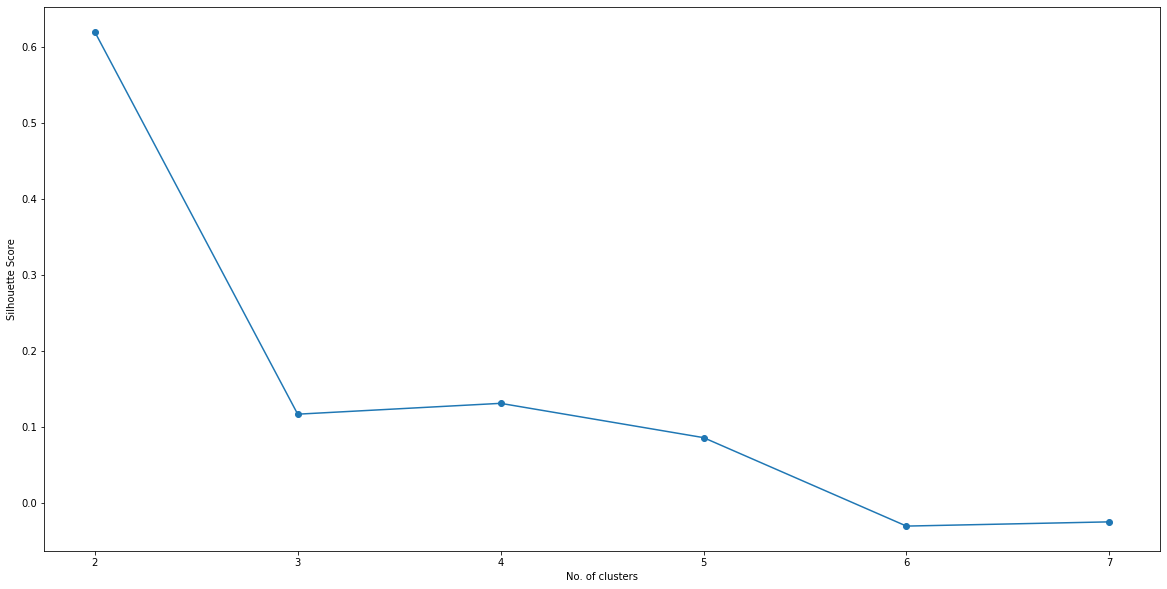

In [88]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [89]:
# run k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 0, 2, 0, 1, 0, 4, 4, 4])

In [90]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighbourhoods_venues_sorted.head()

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Bath Beach,Chinese Restaurant,Pizza Place,Dessert Shop,Donut Shop,Bubble Tea Shop,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Gas Station,Pharmacy
1,0,Battery Park City,Park,Hotel,Gym,Coffee Shop,Shopping Mall,Memorial Site,Food Court,Sandwich Place,BBQ Joint,Plaza
2,0,Bay Ridge,Italian Restaurant,Greek Restaurant,Pizza Place,Spa,Bar,American Restaurant,Pharmacy,Hookah Bar,Playground,Chinese Restaurant
3,2,Bedford Stuyvesant,Coffee Shop,Café,Bar,Pizza Place,Deli / Bodega,Grocery Store,Tiki Bar,Thrift / Vintage Store,Cocktail Bar,Gift Shop
4,0,Bensonhurst,Chinese Restaurant,Italian Restaurant,Ice Cream Shop,Pizza Place,Sushi Restaurant,Donut Shop,Sporting Goods Shop,Pet Store,Grocery Store,Coffee Shop


In [91]:
nyc_merged = df

# merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

nyc_merged

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Gym,Yoga Studio,Tennis Stadium,Pizza Place,Diner,Donut Shop,Pharmacy,Sandwich Place
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,Vietnamese Restaurant,Optical Shop,Salon / Barbershop,American Restaurant,Dessert Shop,Spa,Boutique
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Bank,Mobile Phone Shop,Grocery Store,Supermarket,Sandwich Place,Chinese Restaurant,Tapas Restaurant,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Lounge,Café,Restaurant,Park,Frozen Yogurt Shop,Bakery,Caribbean Restaurant,Chinese Restaurant,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2,Pizza Place,Deli / Bodega,Coffee Shop,Café,Mexican Restaurant,Yoga Studio,Bakery,Latin American Restaurant,Park,Cocktail Bar
5,Manhattan,Manhattanville,40.816934,-73.957385,2,Coffee Shop,Seafood Restaurant,Deli / Bodega,Bar,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Café,Boutique,Sushi Restaurant
6,Manhattan,Central Harlem,40.815976,-73.943211,0,African Restaurant,Cosmetics Shop,French Restaurant,American Restaurant,Bar,Chinese Restaurant,Seafood Restaurant,Gym / Fitness Center,Grocery Store,Beer Bar
7,Manhattan,East Harlem,40.792249,-73.944182,4,Mexican Restaurant,Thai Restaurant,Bakery,Latin American Restaurant,Deli / Bodega,Sandwich Place,Taco Place,Park,Gym,Liquor Store
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,Bakery,Coffee Shop,Gym / Fitness Center,Yoga Studio,Exhibit,Spa,Hotel,Pizza Place,French Restaurant
9,Manhattan,Yorkville,40.775930,-73.947118,0,Italian Restaurant,Gym,Bar,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Deli / Bodega,Pizza Place,Japanese Restaurant,Diner


#### Now, let's see how many Neighbourhoods are there in each cluster

In [92]:
print(nyc_merged['Cluster Labels'].value_counts())

0    45
4    39
2    23
5     1
3     1
1     1
Name: Cluster Labels, dtype: int64


### 2.8 Finally, let's visualize the resulting clusters

In [93]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
markers_colours = ['#0be31a', '#052ef7', '#f7df02', '#f00028', '#f011aa','#02f79e']

In [94]:
# add markers to the map

for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighbourhood'],nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=markers_colours[int(cluster)],
        fill=True,
        fill_color=markers_colours[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 2.9 Examine Clusters

#### Cluster 0

In [95]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,Vietnamese Restaurant,Optical Shop,Salon / Barbershop,American Restaurant,Dessert Shop,Spa,Boutique
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Bank,Mobile Phone Shop,Grocery Store,Supermarket,Sandwich Place,Chinese Restaurant,Tapas Restaurant,Coffee Shop
6,Manhattan,Central Harlem,40.815976,-73.943211,0,African Restaurant,Cosmetics Shop,French Restaurant,American Restaurant,Bar,Chinese Restaurant,Seafood Restaurant,Gym / Fitness Center,Grocery Store,Beer Bar
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,Bakery,Coffee Shop,Gym / Fitness Center,Yoga Studio,Exhibit,Spa,Hotel,Pizza Place,French Restaurant
9,Manhattan,Yorkville,40.775930,-73.947118,0,Italian Restaurant,Gym,Bar,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Deli / Bodega,Pizza Place,Japanese Restaurant,Diner
10,Manhattan,Lenox Hill,40.768113,-73.958860,0,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cocktail Bar,Café,Burger Joint,Gym,Gym / Fitness Center,Art Gallery
11,Manhattan,Roosevelt Island,40.762160,-73.949168,0,Park,Deli / Bodega,School,Coffee Shop,Liquor Store,Gym,Sandwich Place,Greek Restaurant,Scenic Lookout,Outdoors & Recreation
12,Manhattan,Upper West Side,40.787658,-73.977059,0,Italian Restaurant,Coffee Shop,Bar,Bakery,Indian Restaurant,Wine Bar,Pizza Place,Mediterranean Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant
13,Manhattan,Lincoln Square,40.773529,-73.985338,0,Plaza,Performing Arts Venue,Gym / Fitness Center,Concert Hall,Theater,Café,Italian Restaurant,French Restaurant,Clothing Store,Indie Movie Theater
14,Manhattan,Clinton,40.759101,-73.996119,0,Theater,Gym / Fitness Center,Sandwich Place,American Restaurant,Gym,Cocktail Bar,Coffee Shop,Italian Restaurant,Wine Shop,Spa


This is the Largest Cluster containing 45 Neighbourhoods in it. it is represented by green dots in the map. These Neighbourhoods are popular for having Chinese Restaurant, Mexican Restaurant, Vietnamese Restaurant, American Restaurant, Italian Restaurant and many more types of Restaurants, Bakery, Cafes. We can see that these Neighbourhoods are a great place for foodies.

#### Cluster 1

In [96]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 1]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
85,Brooklyn,Bergen Beach,40.61515,-73.898556,1,Harbor / Marina,Baseball Field,Playground,Athletics & Sports,Fish Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field


This Cluster contains only one neighbourhood. It is represented by blue dot. This neighbourhood is popular for Harbor, Playground, Baseball, Athletics & Sports. This place can interest people who like to play outdoor sports. families with kids will be interested in this neighbourhood.

#### Cluster 2

In [97]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 2]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Gym,Yoga Studio,Tennis Stadium,Pizza Place,Diner,Donut Shop,Pharmacy,Sandwich Place
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2,Pizza Place,Deli / Bodega,Coffee Shop,Café,Mexican Restaurant,Yoga Studio,Bakery,Latin American Restaurant,Park,Cocktail Bar
5,Manhattan,Manhattanville,40.816934,-73.957385,2,Coffee Shop,Seafood Restaurant,Deli / Bodega,Bar,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Café,Boutique,Sushi Restaurant
15,Manhattan,Midtown,40.754691,-73.981669,2,Coffee Shop,Hotel,Clothing Store,Bakery,Theater,Sporting Goods Shop,Sandwich Place,Bookstore,Steakhouse,Gym
17,Manhattan,Chelsea,40.744035,-74.003116,2,Coffee Shop,Art Gallery,American Restaurant,Bakery,Seafood Restaurant,Hotel,Italian Restaurant,Nightclub,Bookstore,Market
26,Manhattan,Morningside Heights,40.808000,-73.963896,2,Park,American Restaurant,Bookstore,Coffee Shop,Deli / Bodega,Burger Joint,Sandwich Place,Ice Cream Shop,Farmers Market,Tennis Court
29,Manhattan,Financial District,40.707107,-74.010665,2,Coffee Shop,Pizza Place,Cocktail Bar,Gym / Fitness Center,Steakhouse,Italian Restaurant,Salad Place,Bar,American Restaurant,Café
30,Manhattan,Carnegie Hill,40.782683,-73.953256,2,Coffee Shop,Café,Yoga Studio,Gym / Fitness Center,Cosmetics Shop,Bookstore,Pizza Place,Bakery,French Restaurant,Gym
32,Manhattan,Civic Center,40.715229,-74.005415,2,Coffee Shop,Hotel,Cocktail Bar,Gym / Fitness Center,Yoga Studio,Spa,Park,French Restaurant,Italian Restaurant,Bakery
35,Manhattan,Turtle Bay,40.752042,-73.967708,2,Sushi Restaurant,Coffee Shop,Café,Italian Restaurant,Park,Japanese Restaurant,French Restaurant,Seafood Restaurant,Deli / Bodega,Wine Bar


Neighbourhoods in this cluster are represented by yellow dots on the map. It contains 23 Neighbourhoods. this cluster is unique because it is having Park, Bar, Nightclub, Gym, Yoga Studio. These Neighbourhoods may interest people who party a lot.

#### Cluster 3

In [98]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 3]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Brooklyn,Sea Gate,40.576375,-74.007873,3,Bus Station,Beach,American Restaurant,Spa,Yoga Studio,Fishing Spot,Farm,Farmers Market,Fast Food Restaurant,Field


This cluster is having only one neighbourhoods and the venues are very unique than other clusters. This Neighbourhood is popular for having Bus Station, Beach, Fishing Spot, Markets.
This neighbourhoods is a good place for those who prefer Public Transport. 

#### Cluster 4

In [99]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 4]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Lounge,Café,Restaurant,Park,Frozen Yogurt Shop,Bakery,Caribbean Restaurant,Chinese Restaurant,Spanish Restaurant
7,Manhattan,East Harlem,40.792249,-73.944182,4,Mexican Restaurant,Thai Restaurant,Bakery,Latin American Restaurant,Deli / Bodega,Sandwich Place,Taco Place,Park,Gym,Liquor Store
42,Brooklyn,Sunset Park,40.645103,-74.010316,4,Latin American Restaurant,Mexican Restaurant,Pizza Place,Mobile Phone Shop,Bank,Bakery,Pharmacy,Gym,Fried Chicken Joint,Grocery Store
44,Brooklyn,Gravesend,40.595260,-73.973471,4,Lounge,Italian Restaurant,Pizza Place,Bakery,Deli / Bodega,Music Venue,Martial Arts School,Men's Store,Breakfast Spot,Bus Station
45,Brooklyn,Brighton Beach,40.576825,-73.965094,4,Russian Restaurant,Beach,Restaurant,Eastern European Restaurant,Mobile Phone Shop,Gourmet Shop,Bank,Sushi Restaurant,Neighborhood,Coffee Shop
47,Brooklyn,Manhattan Terrace,40.614433,-73.957438,4,Pizza Place,Donut Shop,Bakery,Ice Cream Shop,Organic Grocery,Bagel Shop,Convenience Store,Grocery Store,Restaurant,Cosmetics Shop
48,Brooklyn,Flatbush,40.636326,-73.958401,4,Deli / Bodega,Pharmacy,Caribbean Restaurant,Chinese Restaurant,Mexican Restaurant,Coffee Shop,Juice Bar,Middle Eastern Restaurant,Fast Food Restaurant,Sandwich Place
49,Brooklyn,Crown Heights,40.670829,-73.943291,4,Pizza Place,Museum,Café,Burger Joint,Pharmacy,Fried Chicken Joint,Candy Store,Supermarket,Sushi Restaurant,Coffee Shop
50,Brooklyn,East Flatbush,40.641718,-73.936103,4,Print Shop,Pharmacy,Department Store,Moving Target,Food & Drink Shop,Supermarket,Caribbean Restaurant,Fast Food Restaurant,Chinese Restaurant,Park
51,Brooklyn,Kensington,40.642382,-73.980421,4,Thai Restaurant,Grocery Store,Pizza Place,Ice Cream Shop,Racetrack,Deli / Bodega,Lingerie Store,Liquor Store,Taco Place,Gas Station


This cluster is represented by pink dots on the map. All the neighbourhoods in this cluster are in Brooklyn.
These Neighbourhoods are popular for having Bank, Pharmacy,Museum, Park, Groery Store, Metro Station, Bus Station, Bookstore, Food, Supermarket.
This should be good for those who have children, since the venues close to these neighborhoods are great to keep the children engaged.

#### Cluster 5

In [100]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 5]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,Brooklyn,Mill Island,40.606336,-73.908186,5,Locksmith,Pool,Yoga Studio,Fish Market,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field


This Cluster contains Mill island. it is popular for Locksmith, repair shops, Fish & Chips Shop, Pool.

### Conclusion

In this Data Science Project, we have attempted to load the dataset for Mumbai(India) and New York(US). We have tried to analyze the neighborhood regions in these metro cities based on the type of popular and top venues they have. We have clustered the neighborhoods using K-means Clustering based on the most common top venues in each of the neighborhood. Our intention with this project was to analyze and understand the difference in the type of life in these metro cities, which can offer decision points for anybody who is considering to settle in either of the metro cities and can get a peek into what type of experience and facilities he will be provided with.
Given our cluster information for both Mumbai and New York, we see that both Mumbai and New York neighbourhoods are a great place for a foodie. However, New York has more variety in food with immigrants making up the majority of the residents in some neighborhoods.
Also due to the proximity of both the cities to the seashore, they offer for harbors, seafood, boat, and ferry rides.
Mumbai is a substantially more religious than New York. If you’re a religious person (I’m not), then you’ve got a lot more avenues to indulge in relevant activities and mingle with like minded people.
also, with low cost of living Mumbai may interest people who are middle class and above.